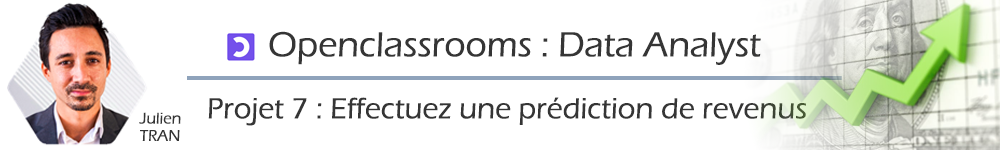

### Mission 2 :

Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.

Représentez la courbe de Lorenz de chacun des pays choisis.

Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.

Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible.  

<font color='royalblue'> En quelle position se trouve la France ? </font>

### Sommaire // Mission 2 🔮

* [1.Importation des librairies et parametres df](#1)
* [2.Fonctions](#2)
* [3.Importation des fichiers CSV](#3)
* [4.Graphique des revenus moyen par classes de revenus](#4)
    * [4.1.Selection des pays](#4.1)
    * [4.2.Graphiques des revenus moyens](#4.2)
* [5.Indice de gini des pays selectionnés](#5)
* [6.Courbes de Lorenz des pays selectionnés](#6)
* [7.Evolution de l'indice de Gini des pays selectionnés](#7)
    * [7.1.Moyenne des indices de Gini](#7.1)
    * [7.2.Les cinqs pays ayant l'indice de Gini le plus elevé sont (ordre decroissant)](#7.2)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Je definis le nombre de lignes max affichées sur None
pd.set_option("max_rows", None) 
pd.set_option("display.precision",7)

## 2.Fonctions <a class="anchor" id="2"></a>

In [2]:
# Je créé une fonction pour tracer la courbe de Lorenz
def lorenz_curve(X):
    n = len(X)
    lorenz = np.cumsum(np.sort(X)) / X.sum()
# La courbe de Lorenz commence à 0
    lorenz = np.append([0],lorenz)

# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# surface entre la première bissectrice et le courbe de Lorenz
    S = 0.5 - AUC 
    gini = 2*S
    print("L'indice de Gini de " +i, "est égal à",gini)

## 3.Importation des fichiers CSV <a class="anchor" id="3"></a>

In [3]:
#Je charge tous les fichiers csv
data_projet7_clean = pd.read_csv("C:/Users/33643/Desktop/P7/CSV2/data_projet7_clean.csv",decimal=".")
Indice_gini = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/Indice_gini.csv",decimal=".")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 4.Graphique des revenus moyen par classes de revenus <a class="anchor" id="4"></a>

## 4.1.Selection des pays <a class="anchor" id="4.1"></a>

In [4]:
data_projet7_clean.head()

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
0,ALB,2008,1,100,728.89795,7297.0,Albania,29.98,3002683.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,29.98,3002683.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,29.98,3002683.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,29.98,3002683.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,29.98,3002683.0


In [5]:
data_projet7_clean.loc[(data_projet7_clean['Country'] == 'France')]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
16000,FRA,2008,1,100,2958.3040,30357.0,France,28.20,60697976.0
16001,FRA,2008,1,100,2958.3040,30357.0,France,31.69,61508924.0
16002,FRA,2008,1,100,2958.3040,30357.0,France,26.60,61869232.0
16003,FRA,2008,1,100,2958.3040,30357.0,France,29.80,62209208.0
16004,FRA,2008,1,100,2958.3040,30357.0,France,29.90,62542884.0
16005,FRA,2008,1,100,2958.3040,30357.0,France,29.80,62879536.0
16006,FRA,2008,1,100,2958.3040,30357.0,France,32.38,63222232.0
16007,FRA,2008,2,100,4412.6753,30357.0,France,28.20,60697976.0
16008,FRA,2008,2,100,4412.6753,30357.0,France,31.69,61508924.0
16009,FRA,2008,2,100,4412.6753,30357.0,France,26.60,61869232.0


In [6]:
mm = data_projet7_clean.loc[(data_projet7_clean['Country'] == 'France'),'income'].mean()
mm

18309.407544999955

### <font color='red'> Je selectionne comme premier pays la France, pour situer notre pays (122K$ pour le quantile 100) </font>

In [28]:
data_projet7_clean_sorted = data_projet7_clean.sort_values(by = [('income')], ascending = False).dropna(axis=0)
data_projet7_clean_sorted.head(8)

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
52391,USA,2008,100,100,176928.55,43261.0,United States of America,40.71,309011456.0
52392,USA,2008,100,100,176928.55,43261.0,United States of America,40.07,311584064.0
52389,USA,2008,100,100,176928.55,43261.0,United States of America,41.48,303486016.0
52388,USA,2008,100,100,176928.55,43261.0,United States of America,42.03,300608448.0
52387,USA,2008,100,100,176928.55,43261.0,United States of America,41.03,297758976.0
52386,USA,2008,100,100,176928.55,43261.0,United States of America,40.91,292354656.0
52390,USA,2008,100,100,176928.55,43261.0,United States of America,40.86,306307552.0
24096,ISL,2008,100,100,160645.27,36527.0,Iceland,29.32,310855.0


### <font color='red'> Je selectionne comme second pays l'Islande avec le revenu moyen le 2e plus haut pour le quantile 100  avec 160645$ </font>

In [8]:
data_projet7_clean.loc[(data_projet7_clean['quantile'] == 100) & (data_projet7_clean['income'] < 122000) & (data_projet7_clean['income'] > 60000)]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
2193,AUT,2008,100,100,72216.680,36193.0,Austria,25.80,8216810.0
2194,AUT,2008,100,100,72216.680,36193.0,Austria,25.30,8285345.0
2195,AUT,2008,100,100,72216.680,36193.0,Austria,26.20,8313732.0
2196,AUT,2008,100,100,72216.680,36193.0,Austria,30.61,8341526.0
2197,AUT,2008,100,100,72216.680,36193.0,Austria,27.50,8372658.0
2198,AUT,2008,100,100,72216.680,36193.0,Austria,28.30,8409945.0
2199,AUT,2008,100,100,72216.680,36193.0,Austria,30.38,8453501.0
2993,BEL,2008,100,100,83104.470,33561.0,Belgium,28.56,10480118.0
2994,BEL,2008,100,100,83104.470,33561.0,Belgium,29.67,10619484.0
2995,BEL,2008,100,100,83104.470,33561.0,Belgium,29.14,10697576.0


### <font color='red'> Je selectionne comme troisieme pays la Grece avec un revenu pour le quantile 100 égal à 63745$ </font>

In [9]:
data_projet7_clean.loc[(data_projet7_clean['quantile'] == 100) & (data_projet7_clean['income'] < 60000) & (data_projet7_clean['income'] > 30000)]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
793,ARG,2008,100,100,43669.242,13220.0,Argentina,48.45,38491968.0
794,ARG,2008,100,100,43669.242,13220.0,Argentina,46.61,39289876.0
795,ARG,2008,100,100,43669.242,13220.0,Argentina,46.43,39684304.0
796,ARG,2008,100,100,43669.242,13220.0,Argentina,45.18,40080160.0
797,ARG,2008,100,100,43669.242,13220.0,Argentina,44.03,40482784.0
798,ARG,2008,100,100,43669.242,13220.0,Argentina,44.36,40895752.0
799,ARG,2008,100,100,43669.242,13220.0,Argentina,42.58,41320496.0
4197,BIH,2007,100,100,31251.586,7472.0,Bosnia and Herzegovina,34.04,3764194.0
4198,BIH,2007,100,100,31251.586,7472.0,Bosnia and Herzegovina,33.06,3762791.0
4199,BIH,2007,100,100,31251.586,7472.0,Bosnia and Herzegovina,33.03,3661173.0


### <font color='red'> Je selectionne comme quatrieme pays la Répubique Tcheque avec un revenu pour le quantile 100 à 37 063$ </font>

In [10]:
data_projet7_clean.loc[(data_projet7_clean['quantile'] == 100) & (data_projet7_clean['income'] < 60000) & (data_projet7_clean['income'] > 40000)]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
793,ARG,2008,100,100,43669.242,13220.0,Argentina,48.45,38491968.0
794,ARG,2008,100,100,43669.242,13220.0,Argentina,46.61,39289876.0
795,ARG,2008,100,100,43669.242,13220.0,Argentina,46.43,39684304.0
796,ARG,2008,100,100,43669.242,13220.0,Argentina,45.18,40080160.0
797,ARG,2008,100,100,43669.242,13220.0,Argentina,44.03,40482784.0
798,ARG,2008,100,100,43669.242,13220.0,Argentina,44.36,40895752.0
799,ARG,2008,100,100,43669.242,13220.0,Argentina,42.58,41320496.0
5494,BOL,2008,100,100,43786.920,3950.0,Bolivia,55.00,9069044.0
5495,BOL,2008,100,100,43786.920,3950.0,Bolivia,56.59,9395449.0
5496,BOL,2008,100,100,43786.920,3950.0,Bolivia,54.49,9558438.0


### <font color='red'> Je selectionne comme cinquieme pays le Costa rica avec un revenu pour le quantile 100 à 57 881$ </font>

In [11]:
data_projet7_clean.loc[(data_projet7_clean['quantile'] == 100) & (data_projet7_clean['income'] < 20000) & (data_projet7_clean['income'] > 15000)]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
99,ALB,2008,100,100,17754.324,7297.0000,Albania,29.98,3002683.0
7894,CHN,2007,100,100,17091.404,5712.0000,China,48.70,1338408576.0
7895,CHN,2007,100,100,17091.404,5712.0000,China,48.40,1345993856.0
7896,CHN,2007,100,100,17091.404,5712.0000,China,49.10,1353569536.0
7897,CHN,2007,100,100,17091.404,5712.0000,China,49.00,1361169408.0
7898,CHN,2007,100,100,17091.404,5712.0000,China,48.10,1368810624.0
7899,CHN,2007,100,100,17091.404,5712.0000,China,47.70,1376497664.0
25797,JOR,2008,100,100,15614.141,5082.9316,Jordan,41.53,6255290.0
25798,JOR,2008,100,100,15614.141,5082.9316,Jordan,41.18,6893258.0
25799,JOR,2008,100,100,15614.141,5082.9316,Jordan,42.53,7662858.0


### <font color='red'>Je selectionne comme sixième pays la Thailande avec un revenu pour le quantile 100 égale à 18 950$ </font>

In [12]:
data_projet7_clean.loc[(data_projet7_clean['quantile'] == 100) & (data_projet7_clean['income'] < 18000) & (data_projet7_clean['income'] > 5000)]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
99,ALB,2008,100,100,17754.3240,7297.000000,Albania,29.98,3002683.0
1493,ARM,2008,100,100,6566.1590,5611.000000,Armenia,45.50,3000715.0
1494,ARM,2008,100,100,6566.1590,5611.000000,Armenia,40.00,2958301.0
1495,ARM,2008,100,100,6566.1590,5611.000000,Armenia,31.20,2932615.0
1496,ARM,2008,100,100,6566.1590,5611.000000,Armenia,29.20,2907615.0
1497,ARM,2008,100,100,6566.1590,5611.000000,Armenia,28.00,2888094.0
1498,ARM,2008,100,100,6566.1590,5611.000000,Armenia,30.00,2877314.0
1499,ARM,2008,100,100,6566.1590,5611.000000,Armenia,29.40,2876536.0
2299,AZE,2008,100,100,12023.7270,8101.000000,Azerbaijan,26.62,8448938.0
3099,BFA,2009,100,100,7693.4043,1085.513900,Burkina Faso,39.76,15141098.0


### <font color='red'>Je selectionne comme septième pays l'Armenie avec un revenu pour le quantile 100 égal à 6566$ </font>

### <font color='red'>Je selectionne comme huitième pays le Vietnam avec un revenu pour le quantile 100 égal à 9522$ </font>

## 4.2.Graphiques des revenus moyens <a class="anchor" id="4.2"></a>

In [13]:
# je selectionne 8 pays pour la suite de l'analyse
data = data_projet7_clean.set_index('ISO3')
df = data.loc(axis=0)['FRA', 'GRC','THA', 'CZE','CRI','ARM', 'ISL','UKR'].reset_index()
df = df.sort_values('income')

In [14]:
# Je créé une classe 'income_log10'
df['income_log10'] = df['income'].apply(lambda x: math.log10(x)) 
df.head()

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population,income_log10
1401,THA,2006,1,100,257.64386,7469.0,Thailand,41.82,65812540.0,2.4110198
1406,THA,2006,1,100,257.64386,7469.0,Thailand,37.53,67518384.0,2.4110198
1405,THA,2006,1,100,257.64386,7469.0,Thailand,39.40,67195032.0,2.4110198
1404,THA,2006,1,100,257.64386,7469.0,Thailand,39.05,66866836.0,2.4110198
1403,THA,2006,1,100,257.64386,7469.0,Thailand,40.29,66530976.0,2.4110198


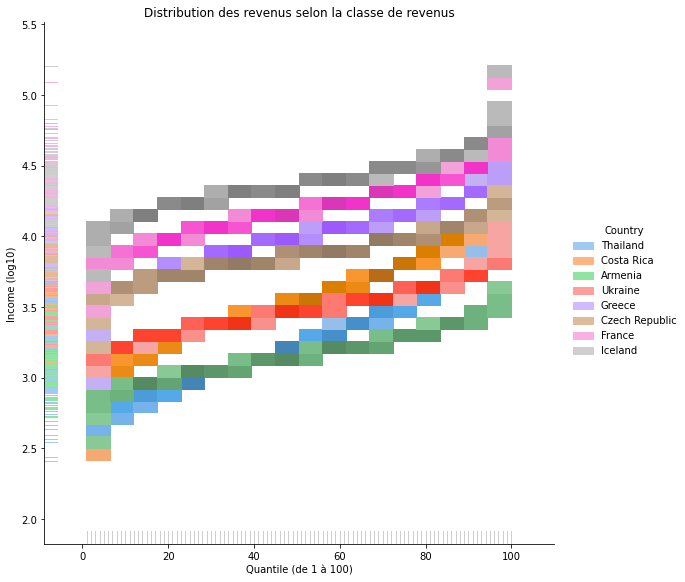

In [15]:
# J'affiche la distribution des revenus en fonction de la classe de revenus
sns.set_palette('pastel')
sns.displot(x='quantile', y='income_log10', hue='Country', rug=True, height=8, data=df)
plt.title('Distribution des revenus selon la classe de revenus')
plt.xlabel('Quantile (de 1 à 100)')
plt.ylabel('Income (log10)')
plt.show()

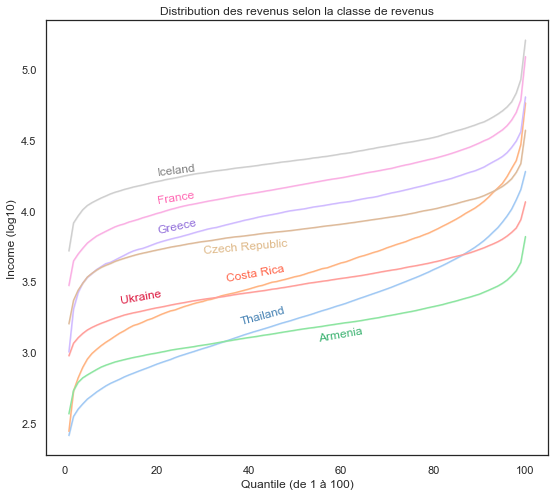

In [16]:
# J'affiche la distribution des revenus en fonction de la classe de revenus
sns.set(rc={"figure.figsize":(9, 8)})
sns.set_style("white")
sns.set_palette('pastel')
sns.lineplot(x='quantile', y='income_log10', hue='Country', data=df,legend=None)
plt.title('Distribution des revenus selon la classe de revenus')
plt.xlabel('Quantile (de 1 à 100)')
plt.ylabel('Income (log10)')

plt.text(20, 4.25 , 'Iceland', fontsize = '12', color='grey', rotation = 7)
plt.text(20, 4.05 , 'France', fontsize = '12', color='hotpink', rotation = 9)
plt.text(20, 3.84, 'Greece', fontsize = '12', color='mediumpurple', rotation = 12)
plt.text(30, 3.7, 'Czech Republic', fontsize = '12', color='burlywood', rotation = 5)
plt.text(35, 3.5, 'Costa Rica', fontsize = '12', color='tomato', rotation = 10)
plt.text(12, 3.35, 'Ukraine', fontsize = '12', color='crimson', rotation = 10)
plt.text(38, 3.2, 'Thailand', fontsize = '12', color='steelblue', rotation = 15)
plt.text(55, 3.08, 'Armenia', fontsize = '12', color='mediumseagreen', rotation = 10)

plt.show()

## 5.Indice de gini des pays selectionnés <a class="anchor" id="5"></a>

In [17]:
# Création d'une boucle pour tracer les courbes de Lorenz de chaque pays
code_ISO3 = ['FRA', 'GRC','THA', 'CZE','CRI','ARM', 'ISL','UKR']

for i in code_ISO3 :
  arr = df.loc[df['ISO3'] == i]['income']
  X = np.array(arr)
  lorenz_curve(X)

L'indice de Gini de FRA est égal à 0.32909623876035843
L'indice de Gini de GRC est égal à 0.32940284260294694
L'indice de Gini de THA est égal à 0.48577697040755397
L'indice de Gini de CZE est égal à 0.25286390547403015
L'indice de Gini de CRI est égal à 0.49253342709924575
L'indice de Gini de ARM est égal à 0.2631076254980862
L'indice de Gini de ISL est égal à 0.28506690027630555
L'indice de Gini de UKR est égal à 0.25513965031960884


## 6.Courbes de Lorenz des pays selectionnés <a class="anchor" id="6"></a>

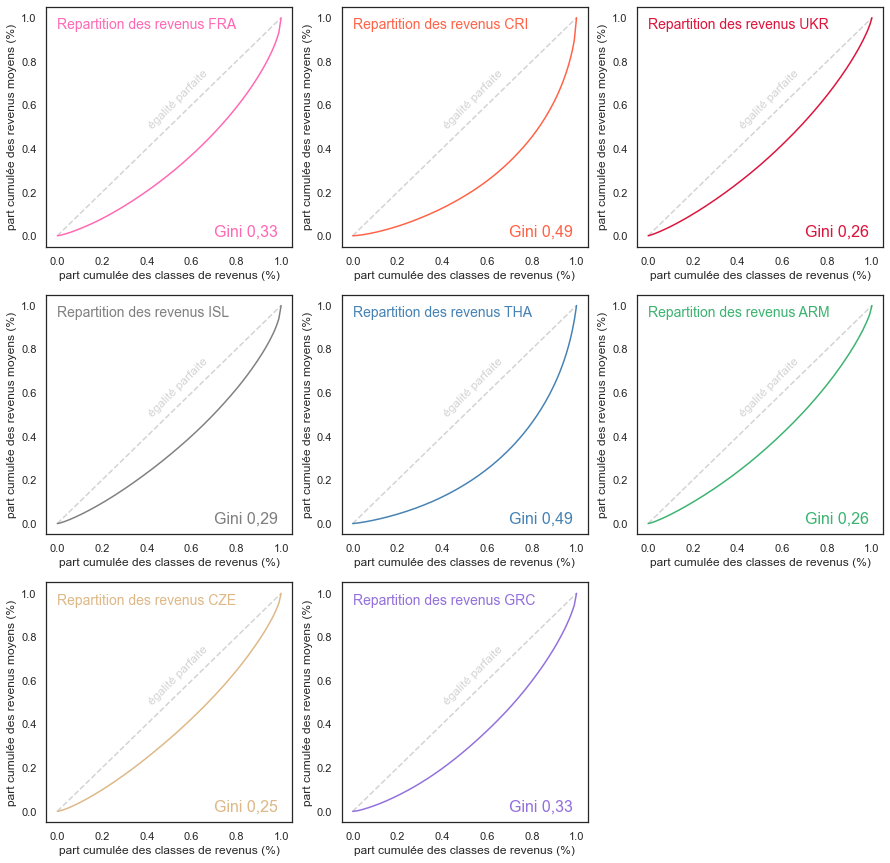

In [18]:
# Préparation des données par pays choisis
income_fr = df[df['Country'] == 'France']
income_gr = df[df['Country'] == 'Greece']
income_cz = df[df['Country'] == 'Czech Republic']
income_co = df[df['Country'] == 'Costa Rica']
income_ukr = df[df['Country'] == 'Ukraine']
income_ice = df[df['Country'] == 'Iceland']
income_th = df[df['Country'] == 'Thailand']
income_ar = df[df['Country'] == 'Armenia']

# Calculs des données des courbes de Lorenz
income_fr = income_fr['income'].values
lorenz_fr = np.cumsum(np.sort(income_fr)) / income_fr.sum()
lorenz_fr = np.append([0], lorenz_fr)

income_gr = income_gr['income'].values
lorenz_gr = np.cumsum(np.sort(income_gr)) / income_gr.sum()
lorenz_gr = np.append([0], lorenz_gr)

income_cz = income_cz['income'].values
lorenz_cz = np.cumsum(np.sort(income_cz)) / income_cz.sum()
lorenz_cz = np.append([0], lorenz_cz)

income_co = income_co['income'].values
lorenz_co = np.cumsum(np.sort(income_co)) / income_co.sum()
lorenz_co = np.append([0], lorenz_co)

income_ukr = income_ukr['income'].values
lorenz_ukr = np.cumsum(np.sort(income_ukr)) / income_ukr.sum()
lorenz_ukr = np.append([0], lorenz_ukr)

income_ice = income_ice['income'].values
lorenz_ice = np.cumsum(np.sort(income_ice)) / income_ice.sum()
lorenz_ice = np.append([0], lorenz_ice)

income_th = income_th['income'].values
lorenz_th = np.cumsum(np.sort(income_th)) / income_th.sum()
lorenz_th = np.append([0], lorenz_th)

income_ar = income_ar['income'].values
lorenz_ar = np.cumsum(np.sort(income_ar)) / income_ar.sum()
lorenz_ar = np.append([0], lorenz_ar)

# Paramètres généraux
fig = plt.figure(figsize = (15,15))

# Paramètres des courbes de Lorenz
fig.add_subplot(3,3,1)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus FRA', fontsize=14, color ='hotpink')
plt.text(0.7, 0, 'Gini 0,33', fontsize=16, color ='hotpink')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_fr)),lorenz_fr, color='hotpink')

fig.add_subplot(3,3,2)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus CRI', fontsize=14, color ='tomato')
plt.text(0.7, 0, 'Gini 0,49', fontsize=16, color ='tomato')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_co)),lorenz_co, color='tomato')

fig.add_subplot(3,3,3)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus UKR', fontsize=14, color ='crimson')
plt.text(0.7, 0, 'Gini 0,26', fontsize=16, color ='crimson')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_ukr)),lorenz_ukr, color='crimson')

fig.add_subplot(3,3,4)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus ISL', fontsize=14, color ='grey')
plt.text(0.7, 0, 'Gini 0,29', fontsize=16, color ='grey')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_ice)),lorenz_ice, color='grey')

fig.add_subplot(3,3,5)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus THA', fontsize=14, color ='steelblue')
plt.text(0.7, 0, 'Gini 0,49', fontsize=16, color ='steelblue')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_th)),lorenz_th, color='steelblue')

fig.add_subplot(3,3,6)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus ARM', fontsize=14, color ='mediumseagreen')
plt.text(0.7, 0, 'Gini 0,26', fontsize=16, color ='mediumseagreen')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_ar)),lorenz_ar, color='mediumseagreen')

fig.add_subplot(3,3,7)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus CZE', fontsize=14, color ='burlywood')
plt.text(0.7, 0, 'Gini 0,25', fontsize=16, color ='burlywood')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_cz)),lorenz_cz, color='burlywood')

fig.add_subplot(3,3,8)
# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'lightgray', linestyle='--', label='Médiatrice')
plt.text(0.4, 0.49, 'égalité parfaite', fontsize=12, rotation = 45, color ='lightgray')
plt.text(0, 0.95, 'Repartition des revenus GRC', fontsize=14, color ='mediumpurple')
plt.text(0.7, 0, 'Gini 0,33', fontsize=16, color ='mediumpurple')
plt.xlabel("part cumulée des classes de revenus (%)")
plt.ylabel("part cumulée des revenus moyens (%)")
plt.plot(np.linspace(0,1,len(lorenz_gr)),lorenz_gr, color='mediumpurple')

## 7.Evolution de l'indice de Gini des pays selectionnés <a class="anchor" id="7"></a>

#### Je choisis d'utiliser un autre fichier pour les indices de gini car data_projet7 ne contient pas tous les indices pour toutes les années d'études de l'ensemble des pays.

In [19]:
Indice_gini.head()

,Country,Countrycode3,Year,Gini
0,Afghanistan,AFG,2007,29.00
1,Afghanistan,AFG,2008,27.80
2,Albania,ALB,1996,28.00
3,Albania,ALB,2002,31.74
4,Albania,ALB,2005,30.60


In [20]:
len(Indice_gini['Country'].unique())

182

In [21]:
Indice_gini = Indice_gini.pivot_table(index=["Countrycode3"], columns=['Year'], values=["Gini"])

# Je sélectionne mes 8 pays
Indice_gini = Indice_gini.loc(axis=0)['FRA', 'GRC','THA', 'CZE','CRI','ARM', 'ISL','UKR']
Indice_gini = Indice_gini.reset_index(drop=False)
Indice_gini = Indice_gini.set_index('Countrycode3')
Indice_gini.columns = Indice_gini.columns.droplevel(0)

Indice_gini

Year,1867,1890,1900,1910,1914,1920,1921,1927,1930,1935,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Countrycode3,,,,,,,,,,,,,,,,,,,,,
FRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.8400000,29.4766667,35.1200000,36.1666667,34.6960,31.6833333,31.800,30.1000000,29.2000000,29.2
GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.4525000,36.7420000,37.5800000,37.5800000,37.3560,34.2300000,35.490,34.4000000,34.5000000,34.2
THA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.8200000,39.7600000,40.2900000,40.2750000,39.4000,37.4600000,39.260,37.8500000,NaN,NaN
CZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.6680000,28.3166667,30.2475000,30.2950000,30.5075,25.7300000,25.515,25.2500000,25.1000000,25.0
CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.6683333,47.7650000,47.0733333,49.3450000,48.5400,48.4166667,48.485,49.0633333,47.8433333,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.2450000,30.0150000,32.3050000,32.5400000,33.6350,34.2100000,30.480,31.5400000,31.4800000,NaN
ISL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.8625000,30.1560000,31.8725000,30.7600000,28.0860,25.2433333,25.470,24.0000000,22.7000000,23.6
UKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.3950000,27.0100000,26.6400000,25.3200000,24.8200,24.5500000,24.740,24.5500000,24.0900000,NaN


In [22]:
Indice_gini = Indice_gini.reset_index(drop=False)

In [23]:
# Je sélectionne mes années d'études
Indice_gini = Indice_gini[["Countrycode3",2004, 2006, 2007, 2008, 2009, 2010,2011]]
Indice_gini = Indice_gini.set_index('Countrycode3')
Indice_gini

Year,2004,2006,2007,2008,2009,2010,2011
Countrycode3,,,,,,,
FRA,29.1000000,28.8400000,29.4766667,35.1200000,36.1666667,34.6960,31.6833333
GRC,35.8340000,38.4525000,36.7420000,37.5800000,37.5800000,37.3560,34.2300000
THA,42.5400000,41.8200000,39.7600000,40.2900000,40.2750000,39.4000,37.4600000
CZE,29.6716667,29.6680000,28.3166667,30.2475000,30.2950000,30.5075,25.7300000
CRI,47.1366667,47.6683333,47.7650000,47.0733333,49.3450000,48.5400,48.4166667
ARM,41.5050000,36.2450000,30.0150000,32.3050000,32.5400000,33.6350,34.2100000
ISL,28.0220000,30.8625000,30.1560000,31.8725000,30.7600000,28.0860,25.2433333
UKR,34.9650000,35.3950000,27.0100000,26.6400000,25.3200000,24.8200,24.5500000


In [24]:
#Je transpose mes colonnes en lignes pour avoir mes pays en abscisse
Indice_gini = Indice_gini.transpose()
Indice_gini

Countrycode3,FRA,GRC,THA,CZE,CRI,ARM,ISL,UKR
Year,,,,,,,,
2004,29.1000000,35.8340,42.540,29.6716667,47.1366667,41.505,28.0220000,34.965
2006,28.8400000,38.4525,41.820,29.6680000,47.6683333,36.245,30.8625000,35.395
2007,29.4766667,36.7420,39.760,28.3166667,47.7650000,30.015,30.1560000,27.010
2008,35.1200000,37.5800,40.290,30.2475000,47.0733333,32.305,31.8725000,26.640
2009,36.1666667,37.5800,40.275,30.2950000,49.3450000,32.540,30.7600000,25.320
2010,34.6960000,37.3560,39.400,30.5075000,48.5400000,33.635,28.0860000,24.820
2011,31.6833333,34.2300,37.460,25.7300000,48.4166667,34.210,25.2433333,24.550


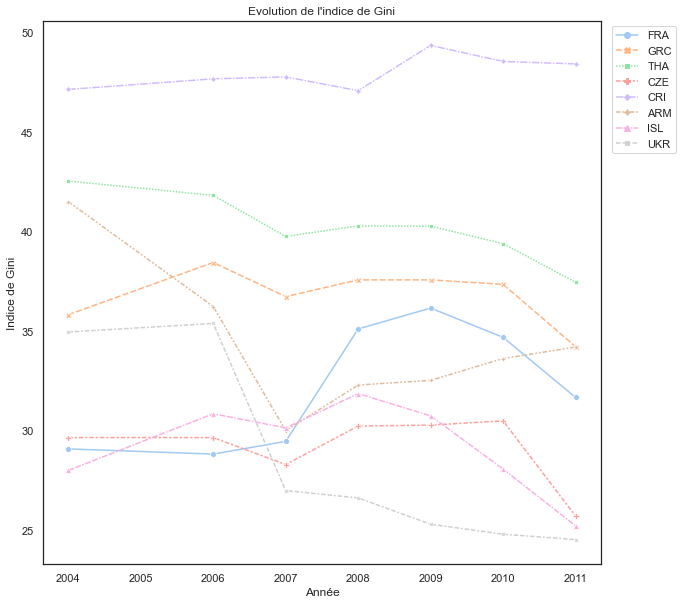

In [25]:
# Je plot les indices de Gini pour mes 8 pays
plt.figure(figsize=(10,10))
sns.lineplot(data=Indice_gini, markers=True)
plt.title("Evolution de l'indice de Gini")
plt.xlabel('Année')
plt.ylabel('Indice de Gini')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

## 7.1.Moyenne des indices de Gini <a class="anchor" id="7.1"></a>

In [26]:
Indice_gini.describe()

Countrycode3,FRA,GRC,THA,CZE,CRI,ARM,ISL,UKR
count,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000
mean,32.1546667,36.8249286,40.2207143,29.2051905,47.9921429,34.3507143,29.2860476,28.3857143
std,3.1373971,1.4020082,1.6558946,1.6964826,0.8208824,3.6870544,2.2907699,4.7290383
min,28.8400000,34.2300000,37.4600000,25.7300000,47.0733333,30.0150000,25.2433333,24.5500000
25%,29.2883333,36.2880000,39.5800000,28.9923333,47.4025000,32.4225000,28.0540000,25.0700000
50%,31.6833333,37.3560000,40.2750000,29.6716667,47.7650000,33.6350000,30.1560000,26.6400000
75%,34.9080000,37.5800000,41.0550000,30.2712500,48.4783333,35.2275000,30.8112500,30.9875000
max,36.1666667,38.4525000,42.5400000,30.5075000,49.3450000,41.5050000,31.8725000,35.3950000


- l'Ukraine (indice de Gini moyen à 28,4)
- la République Tcheque (indice de Gini moyen à 29,2)
- l'Islande (indice de Gini moyen à 29,3)
- l'Arménie (indice de Gini moyen à 34,4)
- la France (indice de Gini moyen à 35,2)
- la Grece (indice de Gini moyen à 36,8)
- la Thailande (indice de Gini moyen à 40,2)
- le Costa Rica (indice de Gini moyen à 48)

## 7.2.Les cinqs pays ayant l'indice de Gini le plus elevé sont (ordre decroissant) <a class="anchor" id="7.2"></a>

- 1/ le Costa Rica (indice de Gini moyen à 48)
- 2/ la Thailande (indice de Gini moyen à 40,2)
- 3/ la Grece (indice de Gini moyen à 36,8)
- 4/ la France (indice de Gini moyen à 35,2)
- 5/ l'Arménie (indice de Gini moyen à 34,4)
- 6/ l'Islande (indice de Gini moyen à 29,3)
- 7/ la République Tcheque (indice de Gini moyen à 29,2)
- 8/ l'Ukraine (indice de Gini moyen à 28,4)

### <font color='red'> La France occupe une place central parmis les 8 pays avec un indice de Gini assez bas mais en 5e place des indices de Gini les plus bas et en 4e place des indices de Gini les plus elevés </font>